<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_de_Dados_2023S2/blob/main/Lab_avaliativo_1a_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab Avaliativo

Conceitos verificados neste Lab:

1. Construção em camadas do `Matplotlib` e seus elementos básicos
2. Como empregar os modos `script layer` e `artist layer`
3. Explorar gráficos de linha, distribuição e relações

**Ao final do Lab, faça um print do seu Colab em .pdf poste seu .pdf e compartilhe o link do seu Colab para leitura.**

<br>

Referências:

- Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) ISBN: 978-65-5545-511-3. [Editora Mackenzie](https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python), [Amazon](https://www.amazon.com.br/VISUALIZA%C3%87%C3%83O-DADOS-PYTHON-ROGERIO-OLIVEIRA/dp/655545511X) ou [Martins Fontes](https://www.martinsfontespaulista.com.br/visualizacao-de-dados-com-python-997336/p)
<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="30%" align="left"/>
</p>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>



---



# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Exercício 1

Produza em um mesmo gráfico o gráfico de linha das funções:

1. $f(x) = tanh(x)$ (empregue `np.tanh()`), e

2. $g(x) = \frac{1}{10}x^2 + 1$

para $x \in [-10,10]$.

1. Inclua um título com a função
2. Empregue uma linha de cor vermelha e estilo traço-ponto para função $f(x)$ e cor preta e estilo sólido para função $g(x)$
3. Altere o tamanho da figura para 8x5
4. Inclua rótulos para os eixos do gráfico
5. Adicione os labels `f(x)` e `g(x)` para cada função

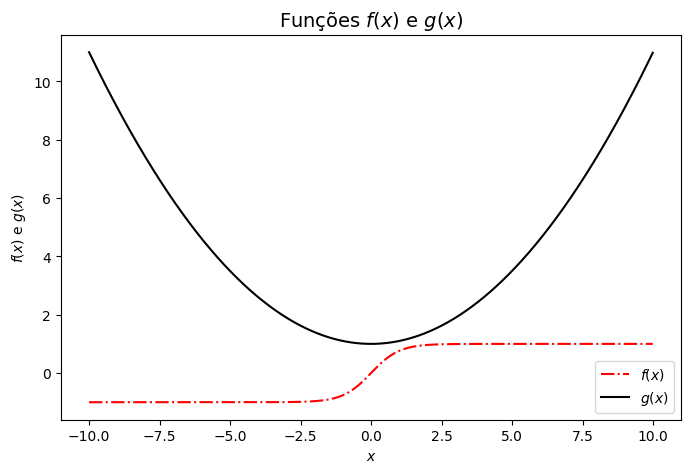

In [ ]:
x = np.arange(-10.0,10.0,0.01)

plt.figure(figsize=(8,5))

plt.plot(x, np.tanh(x), color='r', linestyle='-.', label='$f(x)$')
plt.plot(x, 0.1*x**2 + 1, color='k', linestyle='-', label='$g(x)$')

plt.title('Funções $f(x)$ e $g(x)$',fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$f(x)$ e $g(x)$')
plt.legend()
plt.show()

# Exercício 2  

Produza 4 gráficos envolvendo as variáveis `df.timepoint` e `df.sginal`  em uma mesma figura 12x8.

Produza os gráficos de (1) linha e de (2) dispersão do `Matplotlib` na primeira linha de gráficos, e  os gráfico de (3) linha e de (4) dispersão do `Seaborn` na linha seguinte. No gráfico de dispersão do `Seaborn` diferencie os sinais dos eventos `cue` e `stim` (empregue o parâmetro `hue`). Empregue o modo **script layer** para controlar os diferentes gráficos da figura. Não deixe de incluir título e rótulos para os eixos em cada gráfico.


In [ ]:
df = sns.load_dataset('fmri')
df = df.sort_values('timepoint')
df = df[ df.region == 'parietal']
df.drop(columns='region',inplace=True)
df.head()

,subject,timepoint,event,signal
1063,s0,0,cue,-0.006899
258,s7,0,stim,0.004081
259,s6,0,stim,-0.023319
260,s5,0,stim,-0.051228
261,s4,0,stim,-0.048869


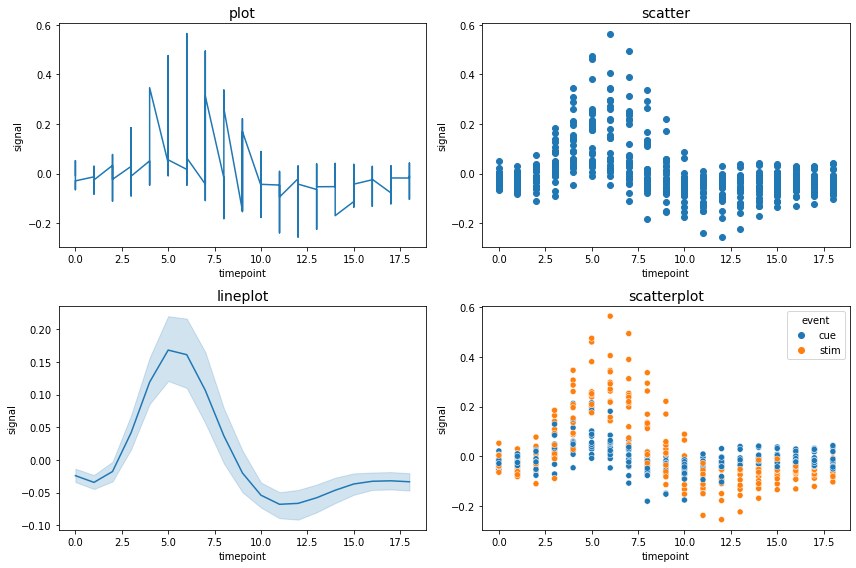

In [ ]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(df.timepoint, df.signal)
plt.title('plot',fontsize=14)
plt.xlabel('timepoint')
plt.ylabel('signal')

plt.subplot(2,2,2)
plt.scatter(df.timepoint, df.signal)
plt.title('scatter',fontsize=14)
plt.xlabel('timepoint')
plt.ylabel('signal')

plt.subplot(2,2,3)
sns.lineplot(x=df.timepoint,y=df.signal)
plt.title('lineplot',fontsize=14)
plt.xlabel('timepoint')
plt.ylabel('signal')

plt.subplot(2,2,4)
sns.scatterplot(x='timepoint',y='signal',data=df,hue='event')
plt.title('scatterplot',fontsize=14)
plt.xlabel('timepoint')
plt.ylabel('signal')

plt.tight_layout()
plt.show()

# Exercício 3  

Empregando o modo **artist layer** exiba em uma mesma figura o último gráfico do exercício anterior (o gráfico de dispersão do seaborn) e um gráfico de distribuição (pode ser o do `matplotlib`) dos valores de `signal`. Não deixe de incluir título e rótulos para os eixos em cada gráfico.  

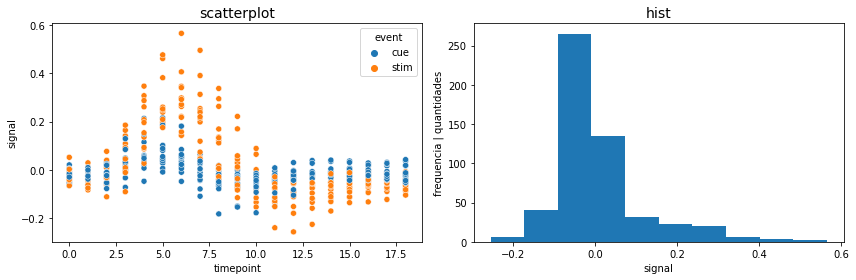

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.scatterplot(x='timepoint',y='signal',data=df,hue='event',ax=ax[0])
ax[0].set_title('scatterplot',fontsize=14)
ax[0].set_xlabel('timepoint')
ax[0].set_ylabel('signal')

ax[1].hist(df.signal)
ax[1].set_title('hist',fontsize=14)
ax[1].set_ylabel('frequencia | quantidades')
ax[1].set_xlabel('signal')


plt.tight_layout()
plt.show()